# Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In this analysis, I have focused more on the visualizations part and its interpretation

# Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style('whitegrid')
from sklearn.impute import SimpleImputer
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LassoLarsCV, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


C:\Users\Maxie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

The libraries used for this data project. I normaly call them at the beginning to improve the clarity of code so i don't have to be typing it all over the place

In [3]:
os.getcwd()

'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'

get current working directory. This is where the data file is saved.

In [4]:
os.chdir(
    'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'
)

In [5]:
os.getcwd()

'C:\\Users\\Maxie\\Documents\\Python For Data Science Handbook\\Blossom Academy\\BIG MART SALES PREDICTION FINAL PROJECT'

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


# Read CSV files

In [7]:
sales_train = pd.read_csv(r"train.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

Accessing my training dataset.

In [8]:
sales_test = pd.read_csv(r"test.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

Accessing my testing dataset.

In [9]:
sales_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5484,FDT44,16.60,Low Fat,0.10,Fruits and Vegetables,116.45,OUT018,2009,Medium,Tier 3,Supermarket Type2,1178.47
5589,FDT50,6.75,Regular,0.11,Dairy,96.98,OUT045,2002,NaN,Tier 2,Supermarket Type1,958.75
1863,FDU20,19.35,Regular,0.02,Fruits and Vegetables,120.31,OUT035,2004,Small,Tier 2,Supermarket Type1,2530.71
2910,FDI14,14.10,Low Fat,0.09,Canned,140.05,OUT035,2004,Small,Tier 2,Supermarket Type1,1411.50
2458,FDV37,13.00,Regular,0.08,Canned,196.04,OUT049,1999,Medium,Tier 1,Supermarket Type1,2570.65


Displaying random samples of our data.

In [10]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory Data Analysis

In [11]:
print(color.BOLD + "Shape of sales training data:" + color.END, sales_train.shape, "\n")
print(color.BOLD + "Shape of sales testing data:"+ color.END, sales_test.shape, "\n")

Shape of sales training data: (8523, 12) 

Shape of sales testing data: (5681, 11) 



Here, the dimensinality of the dataset is checked to know how many rows and columns/features are there in the dataset.

In [12]:
print("Q: Are there any missing values in training data?", "\n" +
      "A: {}".format(sales_train.isna().values.any()))
print ( )
print("Q: Are there any missing values in test data?", "\n" +
      "A: {}".format(sales_test.isna().values.any()))

Q: Are there any missing values in training data? 
A: True

Q: Are there any missing values in test data? 
A: True


Inspecting the presence of any missing values


Completed


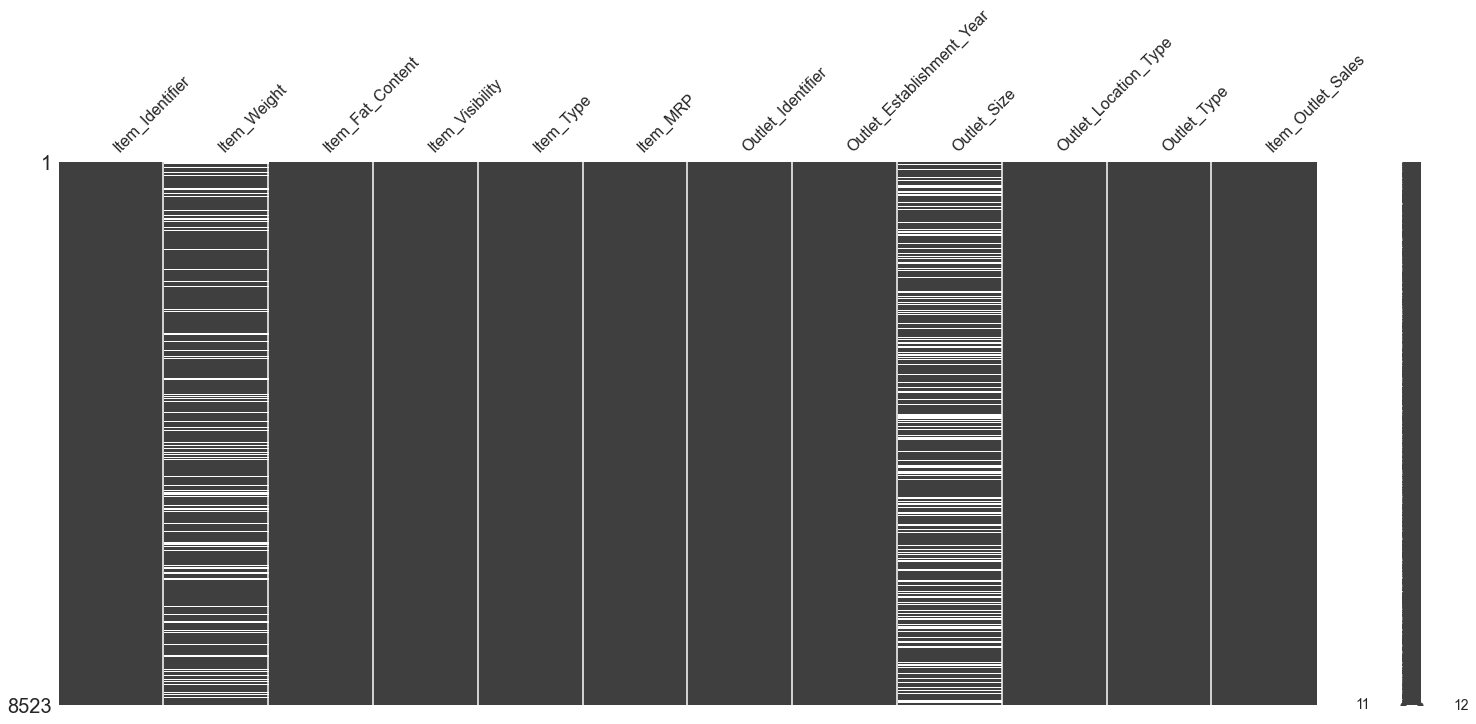

In [13]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

import missingno as msno  # to visually check missing numbers/values.
msno.matrix(sales_train);

Did a clear visualization on the entire dataset to have a cler view of it. We can see that Item_Weight and Outlet_Size have spaces inbetwwen them showing missing spaces/values. It mean work has to be done on these feature columns

**There are missing values in Item_Weights and Outlet_Size**

In [14]:
sales_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Finding out the total sum of missing values in the data which falls under our know columns, Item_Weight and Outlet_Size.

In [15]:
sales_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We do same on our test dataset.

In [16]:
for name in sales_train.columns:
    print(name)
    print(sales_train[name].unique())
    print( )

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.6

Here we traverse through our features and print out the unique data values along with their column_names

In [17]:
sales_train.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

print out the column names

Xplore library give us the summary of the whole dataset in details

In [18]:
# Total percentage of the missing values
missing_data = sales_train.isnull().sum()
total_percentage = (missing_data.sum()/sales_train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [19]:
total = sales_train.isnull().sum().sort_values(ascending=False)

In [20]:
sales_train.isnull().count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [21]:
percent_total = (sales_train.isnull().sum()/ sales_train.isnull().count()).sort_values(ascending=False)*100
percent_total

Outlet_Size                 28.28
Item_Weight                 17.17
Item_Outlet_Sales            0.00
Outlet_Type                  0.00
Outlet_Location_Type         0.00
Outlet_Establishment_Year    0.00
Outlet_Identifier            0.00
Item_MRP                     0.00
Item_Type                    0.00
Item_Visibility              0.00
Item_Fat_Content             0.00
Item_Identifier              0.00
dtype: float64

In [22]:
total = sales_train.isnull().sum().sort_values(ascending=False)
sales_train.isnull().count()
percent_total = (sales_train.isnull().sum()/ sales_train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Outlet_Size,2410,28.28
Item_Weight,1463,17.17


Calcaluted the percentage of missing values in the dataset and visualized it below to give a clear representation

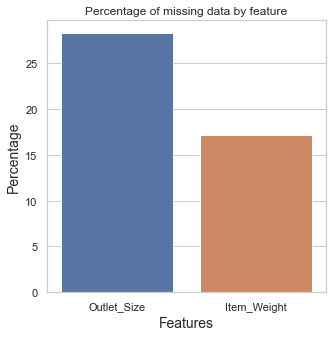

In [23]:
# Plotting the percentage of missing values
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

plt.show()

In [24]:
from sklearn.impute import SimpleImputer
# Instantiating the models
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Replacing the missing values in the new_cases variable with the mean
sales_train['Item_Weight'] = mean_imputer.fit_transform(sales_train['Item_Weight'].values.reshape(-1, 1))

Here the mean is used for imputer because looking at the spread of the Item_Weight data, the skewness is closely symmetrical

In [25]:
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

In [26]:
from sklearn.impute import SimpleImputer
# Instantiating the models
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Replacing the missing values in the new_cases variable with the mode
sales_train['Outlet_Size'] = mode_imputer.fit_transform(sales_train['Outlet_Size'].values.reshape(-1, 1))

same for Outlet_Size, the distribution looks skewed, so i used the median imputer.. since the distributions are in close range

In [27]:
print("Q: Are there any missing values still in training data?", "\n" +
      "A: {}".format(sales_train.isna().values.any()))

Q: Are there any missing values still in training data? 
A: False


In [28]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

checking to see missing values has been fixed.

In [29]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,2.00,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,2.00,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,2.00,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,2.00,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,3.00,Tier 3,Supermarket Type1,994.71


In [30]:
def rewrite(x):
    x = x.replace("reg", "Regular")
    return x

In [31]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite)

In [32]:
def rewrite_(y):
    y = y.replace("LF", "Low Fat")
    return y

In [33]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite_)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite_)

In [34]:
def rewrite__(z):
    z = z.replace("low fat", "Low Fat")
    return z

In [35]:
sales_train['Item_Fat_Content'] = sales_train['Item_Fat_Content'].apply(rewrite__)
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].apply(rewrite__)

Here in the item_Fat_content column, there're errors in data input, so i rewrite the record as it should.

LF is the same as "Low Fat",   reg is same as "Regular"   as it should have been in the record. Just 2 unique characters

In [36]:
sales_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
sales_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [38]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,2.00,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,2.00,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,2.00,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,2.00,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,3.00,Tier 3,Supermarket Type1,994.71


In [39]:
# Replacing it back into categorical values so to visualize wit it
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(1.000000,'Small')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(2.000000,'Medium')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(3.000000,'High')

In [40]:
sales_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

After dealing with Outlet_Size, we convert it back to a string object since we want to use it for visualization

In [41]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical
sales_train['Outlet_Establishment_Year']  = sales_train['Outlet_Establishment_Year'].astype('object')

sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [42]:
#max_threshold = sales_train['Item_Visibility'].quantile(0.93)
#print(max_threshold)
#min_threshold = sales_train['Item_Visibility'].quantile(0.07)
#print(min_threshold)

#new_data = sales_train[ (sales_train.Item_Visibility < max_threshold) & (sales_train.Item_Visibility > min_threshold) ]

# Outliers 

In [43]:
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,2181.29
std,4.23,0.05,62.28,1706.50
min,4.55,0.00,31.29,33.29
25%,9.31,0.03,93.83,834.25
50%,12.86,0.05,143.01,1794.33
75%,16.00,0.09,185.64,3101.30
max,21.35,0.33,266.89,13086.96


A summary of our numerical features. Providing insight on the structure of our data. 
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. 
of a data frame or a series of numeric values.


We can see that under **ITEM_VISIBILIITY** our minimum nummber(**min**) is 0.000 
indicating that how well customers are able to locate product. Visibility can't be 0.000 in the real world (can't be seen at all, 
perharps maybe the item is not available in the shop or the customers have eye defects), it intuitively prompt us that it is an outlier or wrong inputed record. 

What do we do now ? Well i replaced 0.000 with the nearest minimum data point apart from 0.000 under item_visibility

Our nearest min number is 0.003574698. Correction will be made below in futher analysis  

# Item_Outlet_Sales

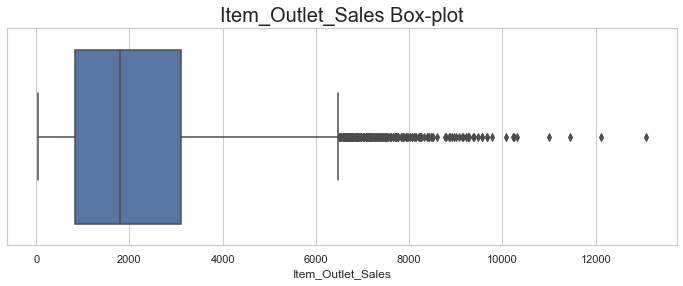

In [44]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Outlet_Sales', data = sales_train);
plt.title('Item_Outlet_Sales Box-plot', fontsize=20);

**There are outliers PRESENT**

Here we're visualizing Item_Outlet_Sales which has proven to have to have outliers in the data. there is the need to treat these outliers so they don't influence our prediction. From the boxplot, we're assuming that any datapoint greater than 6200+ is an outlier. (i.e. after the end of the whiskers)

### Treating the outlier in Item_Outlet_Sales

In [45]:
max_threshold = sales_train['Item_Outlet_Sales'].quantile(0.97)
print("Maximum threshold:", max_threshold)

min_threshold = sales_train['Item_Outlet_Sales'].quantile(0.03)
print("Minimum threshold:", min_threshold)

new_sales_train_based_on_Outlet_Sales = sales_train[ (sales_train['Item_Outlet_Sales'] < max_threshold) & 
                                    (sales_train['Item_Outlet_Sales'] > min_threshold) ]


Maximum threshold: 6094.3070880000005
Minimum threshold: 145.583828


I treated outliers using the inter-quantile ranges. since its observed percentage wise, the low quantile threshold is 3% representing 145.58 whereas the upper quartile range is 97% representing 6094.3070. Any value/datapoint out of this range will be considered as an outlier.

In [46]:
new_train = new_sales_train_based_on_Outlet_Sales.copy()

I made a copy of the data where Item_Outlet_Sales outliers are treated and named it new_train. At this point, we will continue dealing with the rest of the features with outliers from the remains of the previously checked data (new_train).

In [47]:
# new_train.to_csv(r'C:\Users\Maxie\Desktop\Big-Mart Sales Prediction.csv', index = False)

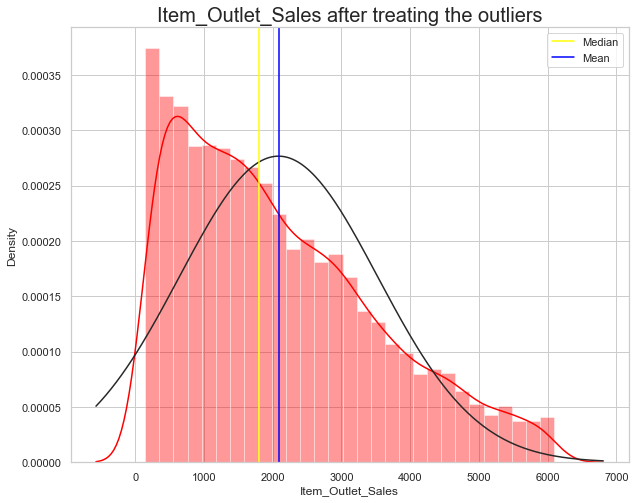

In [48]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Outlet_Sales'], fit = norm, color='red')
plt.title('Item_Outlet_Sales after treating the outliers', fontsize=20)
plt.axvline(new_train['Item_Outlet_Sales'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Outlet_Sales'].mean(),color='blue',label='Mean')
plt.legend();

After treating outlier, this is how the distribution of **ITEM_OUTLET_SALES** looks like.

From the diagram we can see that the distribution of **ITEM_OUTLET_SALES** is positively skewed (spreads to the right)

In [49]:
print ("Mean (blue line in the diagram, indicating the average sales under Item_Outlet_Sales):", new_train['Item_Outlet_Sales'].mean())
print ("Median (yellow line in the diagram above):", new_train['Item_Outlet_Sales'].median())
print( )                                                         
print ("Skewness under 'Item_Outlet_Sales' :", new_train['Item_Outlet_Sales'].skew())
print("Kurtosis under 'Item_Outlet_Sales' : ", new_train['Item_Outlet_Sales'].kurt())

Mean (blue line in the diagram, indicating the average sales under Item_Outlet_Sales): 2085.067683684941
Median (yellow line in the diagram above): 1794.3310000000001

Skewness under 'Item_Outlet_Sales' : 0.7294063976490921
Kurtosis under 'Item_Outlet_Sales' :  -0.2537845171519879


** The distribution is **positively skewed** which says some of the items have sales less then the mean value.
 
** The distribution curve is **platykurtic** because the kurtosis under 'Item_Outlet_Sales' is -0.2629 which tells that it is less prone to outliers therefore investment returns is desirable here.

**Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

kurtosis is used as a measure of financial risk. A large kurtosis is associated with a high level of risk for an investment because it indicates that there are high probabilities of extremely large and extremely small returns. On the other hand, a small kurtosis signals a moderate level of risk because the probabilities of extreme returns are relatively low.


**EXCESS KURTOSIS**
An excess kurtosis is a metric that compares the kurtosis of a distribution against the kurtosis of a normal distribution. The kurtosis of a normal distribution equals 3. Therefore, the excess kurtosis is found using the formula:
**Excess Kurtosis = Kurtosis – 3**





**TYPE OF KURTOSIS**

**mesokurtic distribution**::
Data that follows a mesokurtic distribution shows an **excess kurtosis of zero or close to zero**. This means that if the data follows a normal distribution, it follows a mesokurtic distribution/mesokurtic


**Leptokurtic distribution**::
Leptokurtic indicates a **positive excess kurtosis**. The leptokurtic distribution shows heavy tails on either side, **indicating large outliers**. In finance, a leptokurtic distribution shows that the investment returns may be **prone to extreme values on either side**. Therefore, an investment whose returns follow a **leptokurtic distribution is considered to be risky.**


**Platykurtic distribution**::
Platykurtic distribution shows a **negative excess kurtosis**. The kurtosis reveals a distribution with flat tails. The flat tails indicate the **small outliers in a distribution.** In the finance context, the platykurtic distribution of the **investment returns is desirable for investors** because there is a small probability that the investment would experience extreme returns.

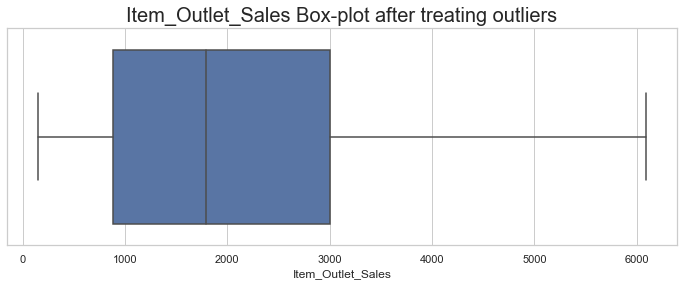

In [50]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Outlet_Sales', data = new_train);
plt.title('Item_Outlet_Sales Box-plot after treating outliers', fontsize=20);

There are no more outliers in Item_Outlet_Sales

# Item_Weight

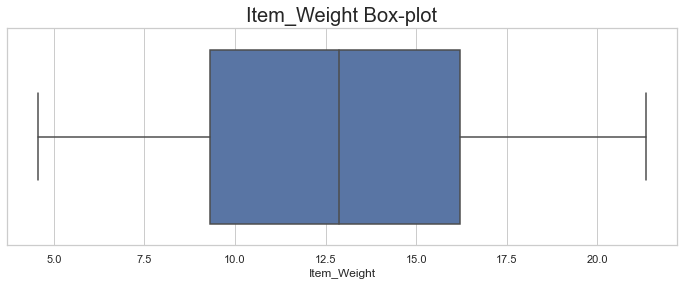

In [51]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Weight', data = new_train);
plt.title('Item_Weight Box-plot', fontsize=20);

** No presence of outliers in Item_Weight as shown in the boxplot above.

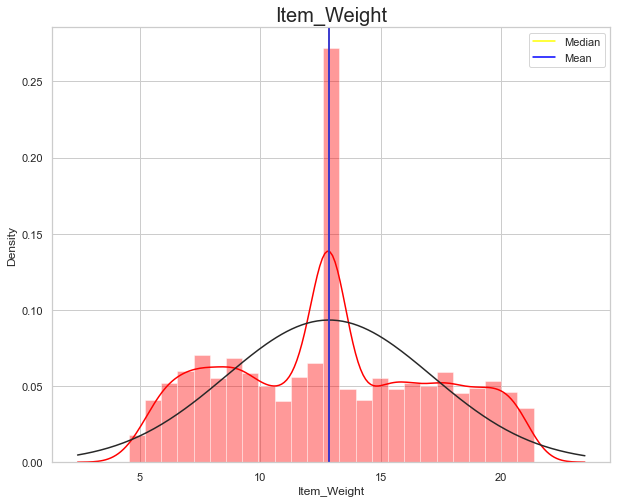

In [52]:

plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Weight'], fit = norm, color='red')
plt.title('Item_Weight', fontsize=20)
plt.axvline(new_train['Item_Weight'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Weight'].mean(),color='blue',label='Mean')
plt.legend();

A representation of **ITEM_WEIGHT** distribution.

From the diagram we can see that the distribution of **ITEM_WEIGHT** is symmetrical. 

In [53]:
print ("Mean (blue line):", new_train['Item_Weight'].mean())
print ("Median (yellow line):", new_train['Item_Weight'].median())
print( )
print ("Skewness under 'Item_Weight' :", new_train['Item_Weight'].skew())
print("Kurtosis under 'Item_Weight' : ", new_train['Item_Weight'].kurt())

Mean (blue line): 12.860747765643435
Median (yellow line): 12.857645184135976

Skewness under 'Item_Weight' : 0.08806892067785946
Kurtosis under 'Item_Weight' :  -0.9040115018989914


** The distribution looks **symmetric** as the mean and the median value are almost same. This is because the dsitribution does not influence the mean or median since it's not a skewed distribution.

** The distribution curve is **platykurtic** which tells that it is less prone to the outliers.

# Item_Visibility

## Detecting the outlier in Item_Visibility

In [54]:
new_train['Item_Visibility'].min()  # But the minimum value of the item visibility feature is zero(0)

0.0

Minimum value of the item visibility feature shouldn't be zero(0)

In [55]:
# The minimum value of the item visibility feature is zero(0)
# Replacing the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
new_train['Item_Visibility'] = new_train['Item_Visibility'].replace(0.000000,0.003574698)
new_train['Item_Visibility']

0      0.02
1      0.02
2      0.02
3      0.00
4      0.00
       ... 
8518   0.06
8519   0.05
8520   0.04
8521   0.15
8522   0.04
Name: Item_Visibility, Length: 8011, dtype: float64

ITEM_VISIBILIITY, our minimum value (min) is 0.000. Replaced it with 0.003574698

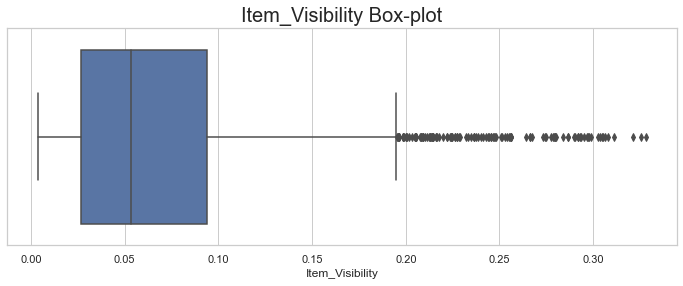

In [56]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = new_train)
plt.title('Item_Visibility Box-plot', fontsize=20);

** There are outliers in the **ITEM_VISIBILITY** indicated by the dots after the right whisker. 

## Treating the outlier in Item_Visibility

In [57]:
max_threshold = new_train['Item_Visibility'].quantile(0.98)
print("Maximum threshold:", max_threshold)

min_threshold = new_train['Item_Visibility'].quantile(0.02)
print("Minimum threshold:", min_threshold)

new_train = new_train[ (new_train['Item_Visibility'] < max_threshold) & (new_train['Item_Visibility'] > min_threshold) ]


Maximum threshold: 0.18445131939999998
Minimum threshold: 0.003574698


Remember we are using the data treated for the Item_Outlet_Sales previously is now our new data as we are building upon it

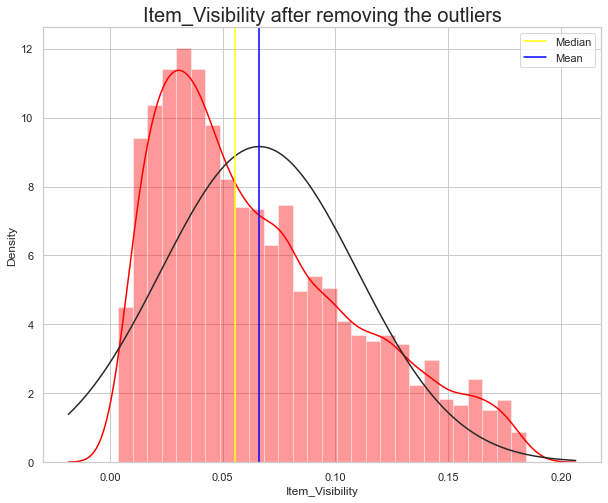

In [58]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_Visibility'], fit = norm, color='red')
plt.title('Item_Visibility after removing the outliers', fontsize=20)
plt.axvline(new_train['Item_Visibility'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_Visibility'].mean(),color='blue',label='Mean')
plt.legend();

A representation of **ITEM_VISIBILITY** distribution.

From the diagram we can see that the distribution of ITEM_VISIBILITY is **positively skewed.**

In [59]:
print ("Mean (blue line):", new_train['Item_Visibility'].mean())
print ("Median (yellow line):", new_train['Item_Visibility'].median())
print( )
print ("Skewness under 'Item_Visibility' :", new_train['Item_Visibility'].skew())
print("Kurtosis under 'Item_Visibility' : ", new_train['Item_Visibility'].kurt())


Mean (blue line): 0.0661711908541526
Median (yellow line): 0.055558509000000006

Skewness under 'Item_Visibility' : 0.7557320893577627
Kurtosis under 'Item_Visibility' :  -0.32033627470400994


** The distribution is positively skewed which says some of the items have sales less then the mean value.

** The distribution curve is platykurtic because the kurtosis under 'Item_Visibility' is -0.32033 which tells that it is less prone to outliers.

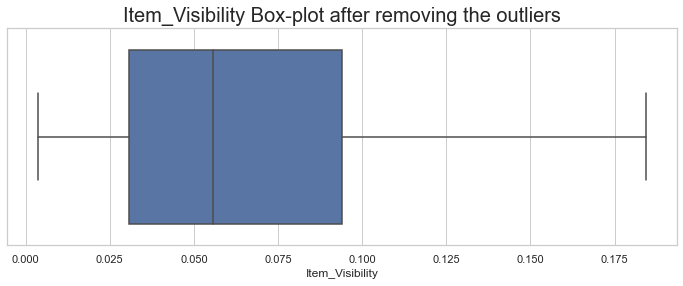

In [60]:
fig = plt.subplots(figsize=(12, 4))
sns.boxplot(new_train['Item_Visibility'])
plt.title('Item_Visibility Box-plot after removing the outliers', fontsize=20);

** No presence of outliers in Item_Visibility after outlier treatment.

# Item_MRP

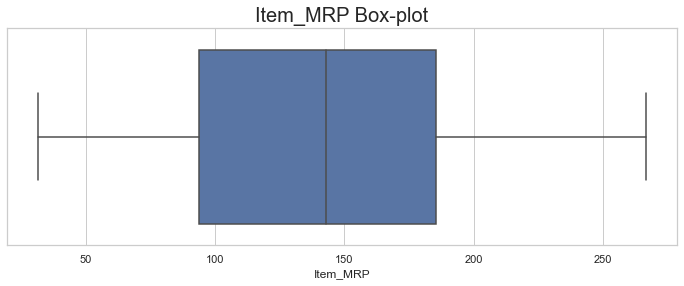

In [61]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_MRP', data = sales_train)
plt.title('Item_MRP Box-plot', fontsize=20);

** No presence of outliers in Item_MRP as shown in the boxplot above.

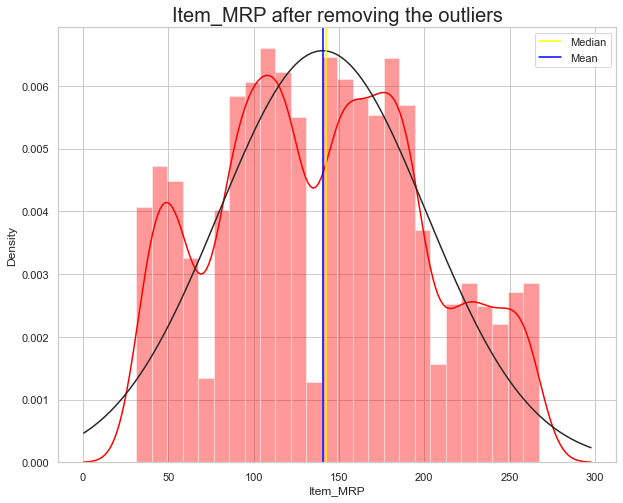

In [62]:
plt.figure(figsize=(10, 8))
sns.distplot(new_train['Item_MRP'], fit = norm, color='red')
plt.title('Item_MRP after removing the outliers', fontsize=20)
plt.axvline(new_train['Item_MRP'].median(),color='yellow',label='Median')
plt.axvline(new_train['Item_MRP'].mean(),color='blue',label='Mean')
plt.legend();


A representation of **ITEM_MRP** distribution.

From the diagram we can see that the distribution of **ITEM_MRP** is symmetrical.

In [63]:
print ("Mean (blue line):", new_train['Item_MRP'].mean())
print ("Median (yellow line):", new_train['Item_MRP'].median())
print( )
print ("Skewness under 'Item_MRP' :", new_train['Item_MRP'].skew())
print("Kurtosis under 'Item_MRP' : ", new_train['Item_MRP'].kurt())

Mean (blue line): 140.4591519097459
Median (yellow line): 142.7128

Skewness under 'Item_MRP' : 0.1342779987114367
Kurtosis under 'Item_MRP' :  -0.8339905812645636


** The distribution looks **symmetric** as the mean and the median value are almost same. 

** The distribution curve is **platykurtic** which tells that it is less prone to the outliers.

<AxesSubplot:>

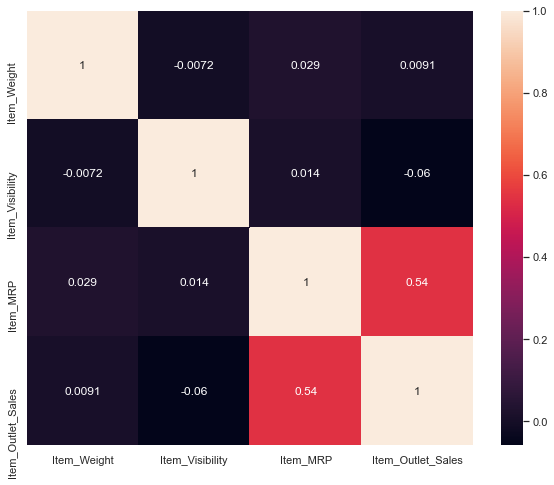

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(new_train.corr(), annot=True)

*Item MRP and Item outlet sales shows high positive correlation which tells that as the MRP of the item increases the sales of that item also increases.* **(Rule for positive correlation)**

*Similarly we can also notice that the item visibility and item outlet sales are negatively correlated which means that if the item is less visible then the sale of the item is more or if the item is more visible then the sale of the item is less..*
**(They're negatively correlated)**


# Univariate Analysis


Completed


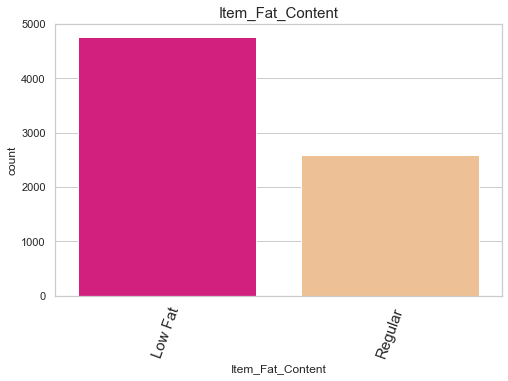

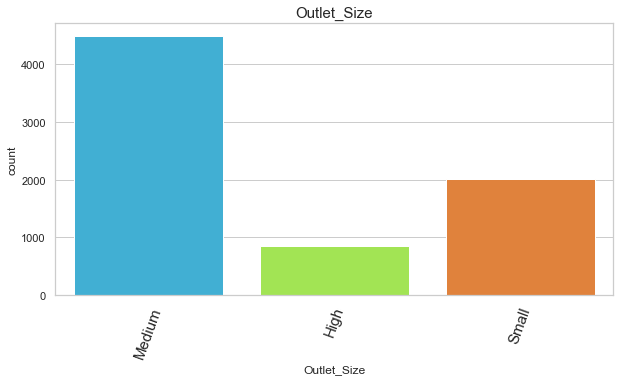

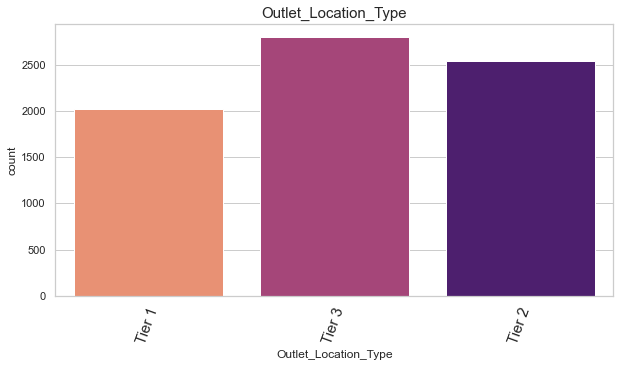

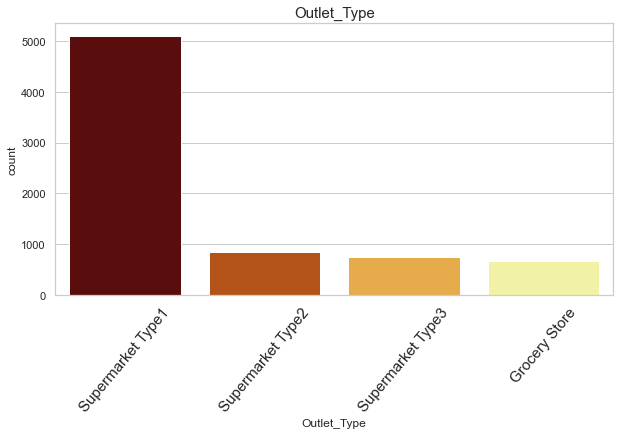

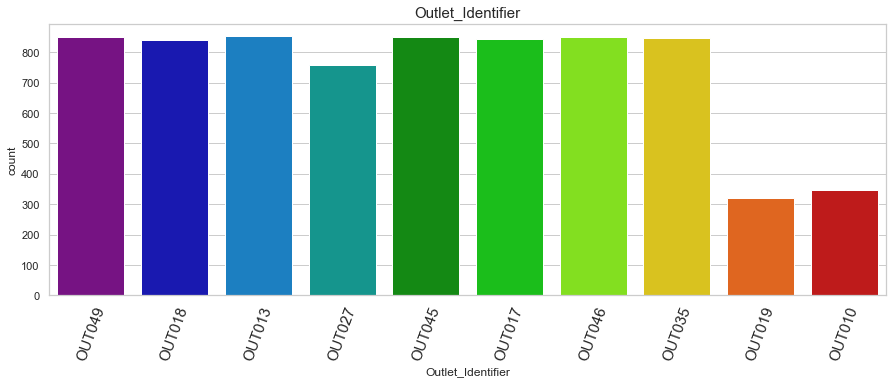

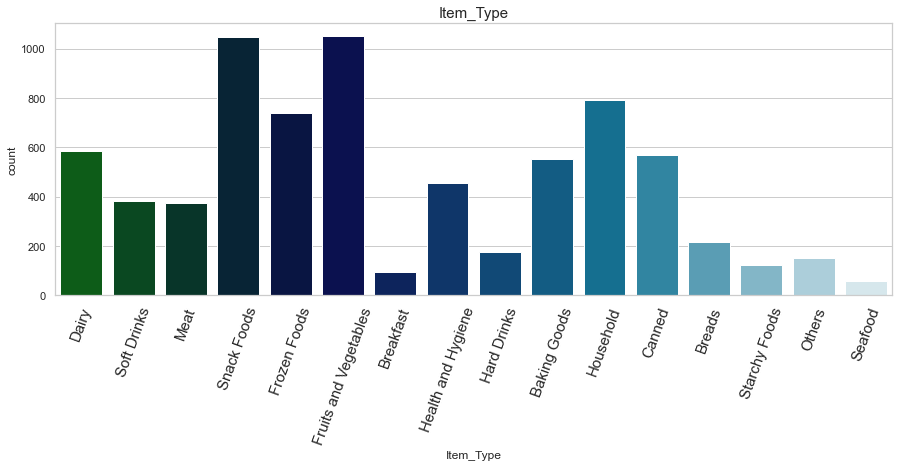

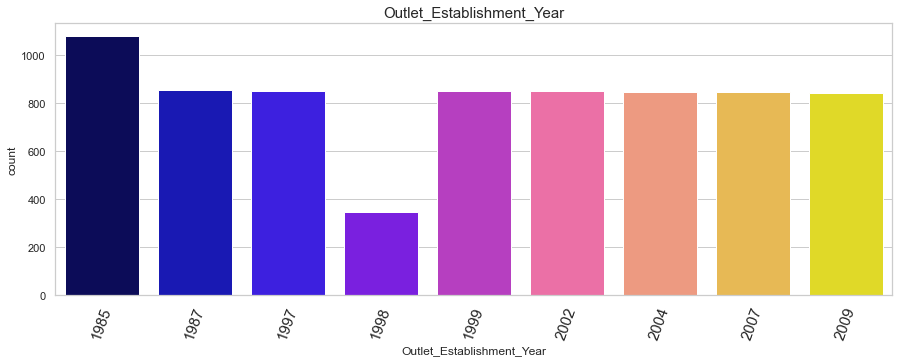

In [65]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')


fig = plt.figure(figsize=(8, 5))
sns.countplot(new_train['Item_Fat_Content'], palette='Accent_r')
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Fat_Content", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Size'], palette='turbo')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Size", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Location_Type'], palette='magma_r')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Location_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(10, 5))
sns.countplot(new_train['Outlet_Type'], palette='afmhot')
plt.xticks(rotation=50, fontsize=15)
plt.title("Outlet_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Outlet_Identifier'], palette='nipy_spectral')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Identifier", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Item_Type'], palette='ocean')
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type", fontsize=15)
plt.show()

fig = plt.figure(figsize=(15, 5))
sns.countplot(new_train['Outlet_Establishment_Year'], palette='gnuplot2')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Establishment_Year", fontsize=15)
plt.show()

# Multivariate Analysis


Completed


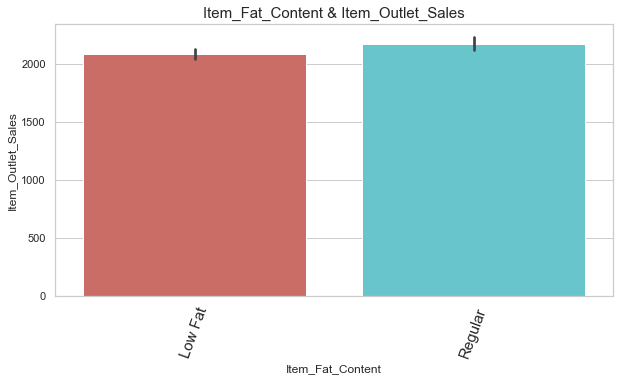

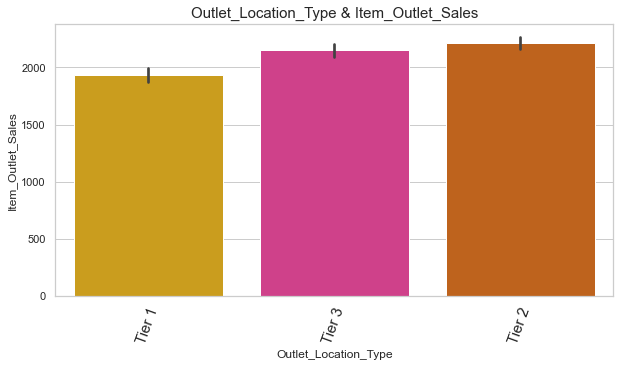

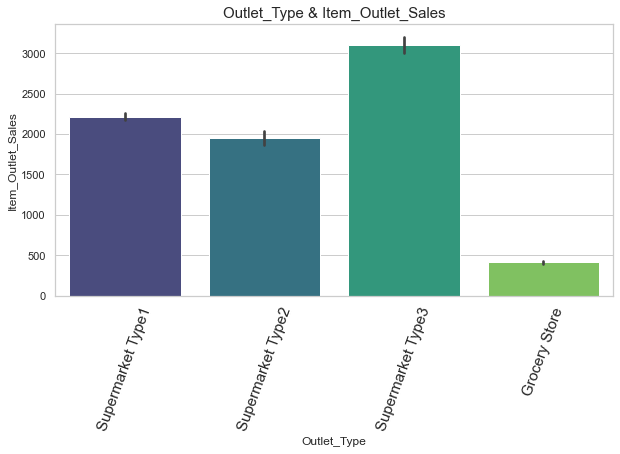

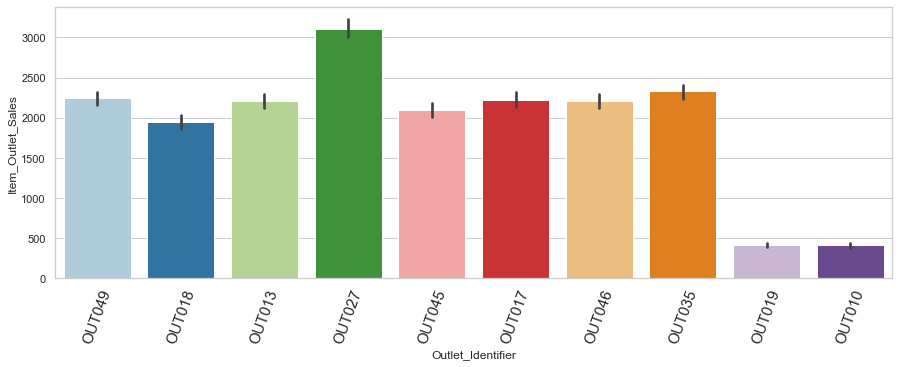

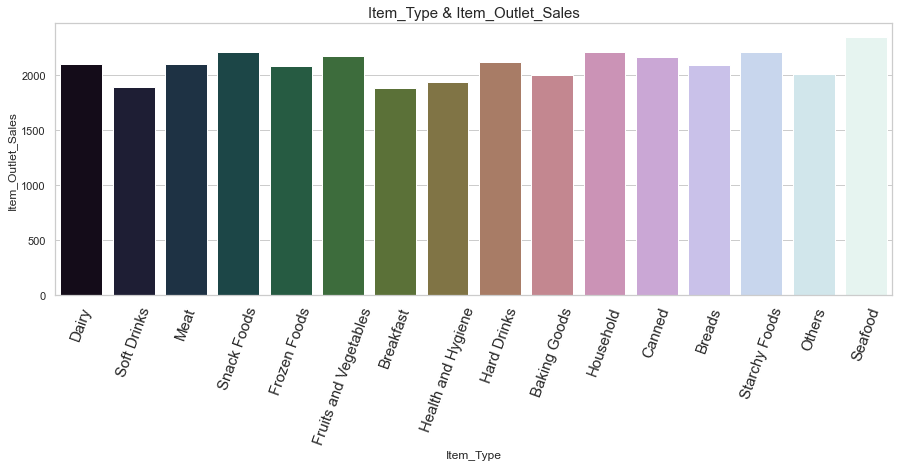

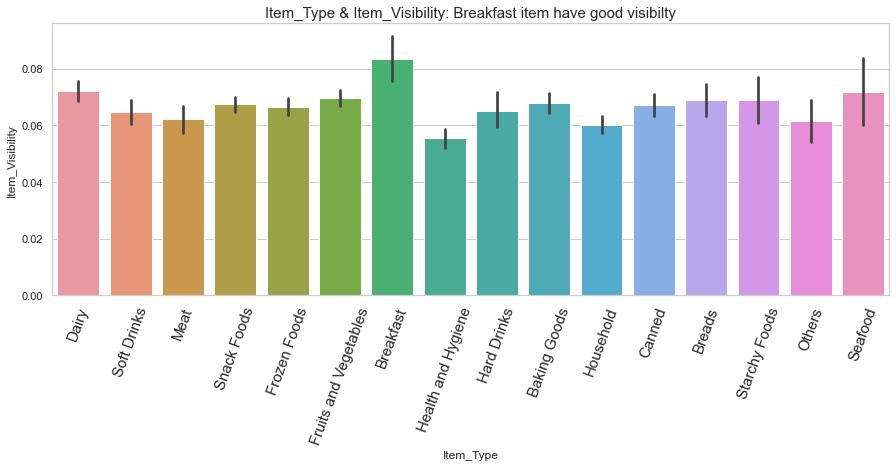

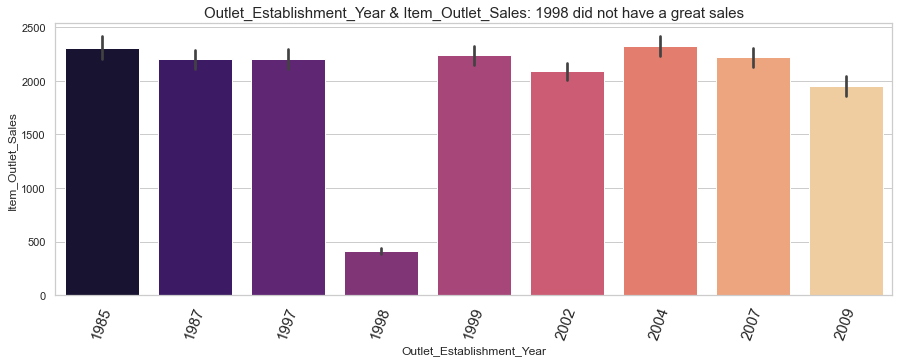

In [66]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Item_Fat_Content'], new_train['Item_Outlet_Sales'], palette='hls')
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Fat_Content & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Outlet_Location_Type'], new_train['Item_Outlet_Sales'], palette='Dark2_r')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Location_Type & Item_Outlet_Sales", fontsize=15) 
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.barplot(new_train['Outlet_Type'], new_train['Item_Outlet_Sales'], palette='viridis')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Outlet_Identifier'], new_train['Item_Outlet_Sales'], palette='Paired')
plt.xticks(rotation=70, fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Item_Type'], new_train['Item_Outlet_Sales'], ci = False, palette='cubehelix')
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Item_Type'],new_train['Item_Visibility'])
plt.xticks(rotation=70,fontsize=15)
plt.title("Item_Type & Item_Visibility: Breakfast item have good visibilty", fontsize=15)


print( )

fig = plt.figure(figsize=(15, 5))
sns.barplot(new_train['Outlet_Establishment_Year'], new_train['Item_Outlet_Sales'], palette='magma')
plt.xticks(rotation=70, fontsize=15)
plt.title("Outlet_Establishment_Year & Item_Outlet_Sales: 1998 did not have a great sales", fontsize=15)
plt.show()


In [67]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


## After the treating outliers 


Completed


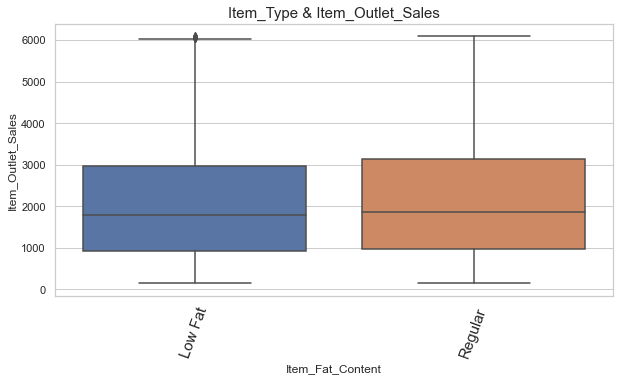

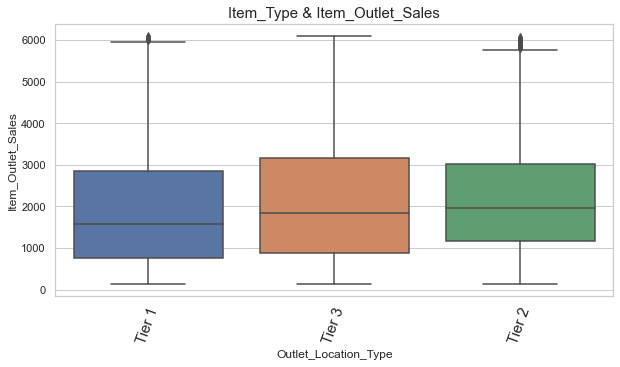

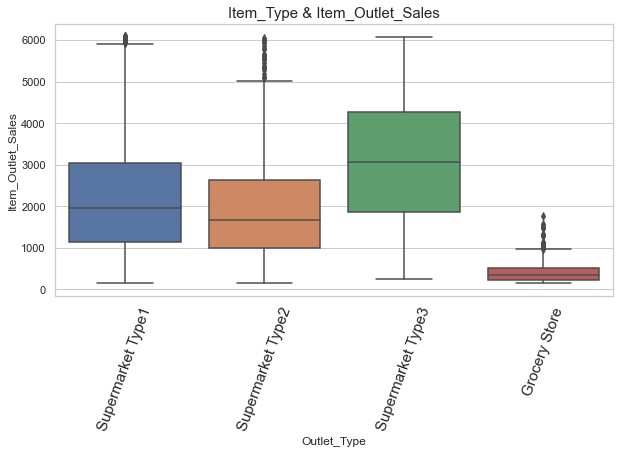

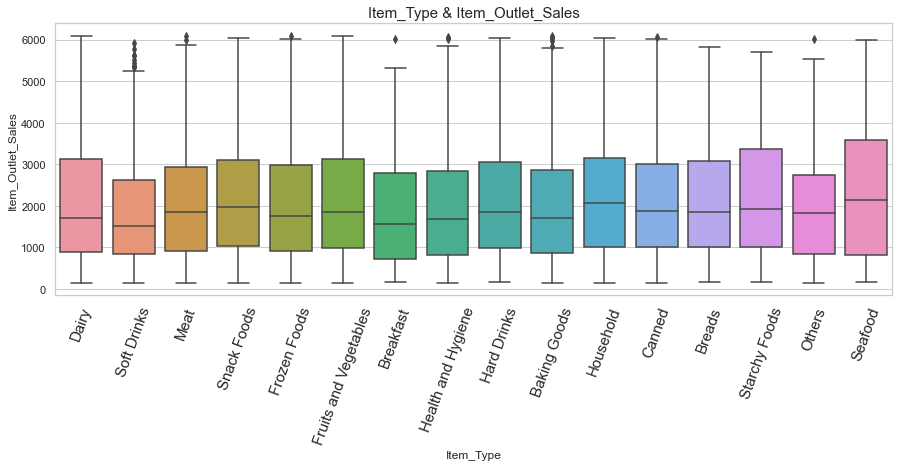

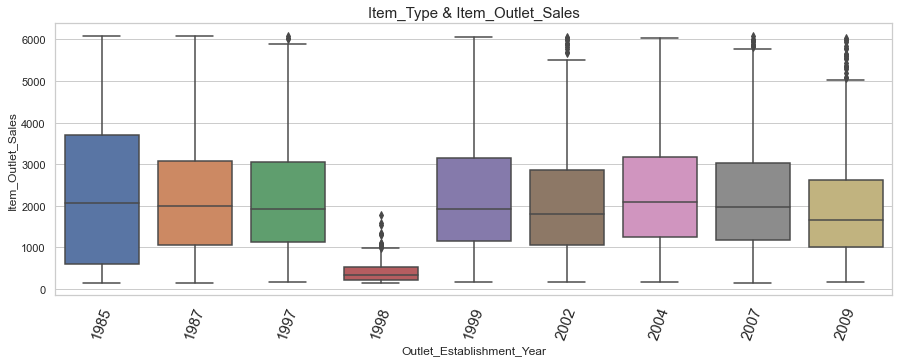

In [68]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 
print ('Completed')

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Item_Fat_Content'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Outlet_Location_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15) 
plt.show()

print( )

fig = plt.figure(figsize=(10, 5))
sns.boxplot(new_train['Outlet_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.boxplot(new_train['Item_Type'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()

print( )

fig = plt.figure(figsize=(15, 5))
sns.boxplot(new_train['Outlet_Establishment_Year'], new_train['Item_Outlet_Sales'])
plt.xticks(rotation=70, fontsize=15)
plt.title("Item_Type & Item_Outlet_Sales", fontsize=15)
plt.show()


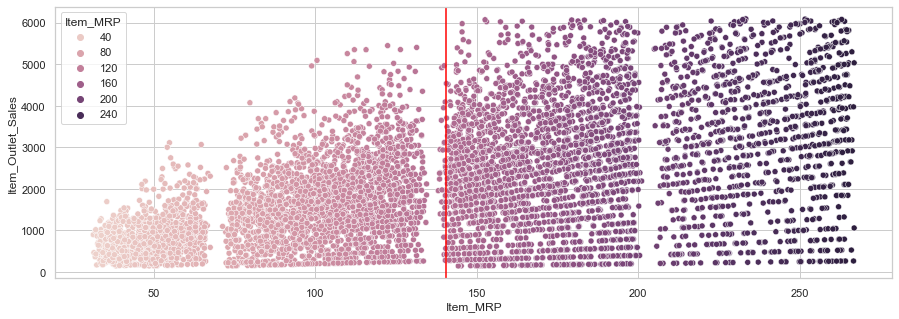

In [69]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=new_train)
plt.axvline(new_train['Item_MRP'].mean(),color='red',label='Mean')


** By looking at the plot we can say that if the MRP is high, then the sales are high. If an item has MRP more then the mean value then the its sales are higher. 

Looking at the mean line, we can see that the points starts to fade to the left and the Item_Outlet_Sales as a whole drops. Any point after the mean line(red) has higher Item_Outlet_Sales as Item_MRP also increases. This shows that Item_MRP and Item_Outlet_Sales have a positive relationship.

In [70]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
6,FDO10,13.65,Regular,0.01,Snack Foods,57.66,OUT013,1987,High,Tier 3,Supermarket Type1,343.55
7,FDP10,12.86,Low Fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76


In [71]:
new_train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
6       Regular
7       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 7357, dtype: object

In [72]:
# Mapping the binary features
new_train['Item_Fat_Content'] = new_train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})
new_train['Outlet_Size'] = new_train['Outlet_Size'].map({'Small': 1, 'Medium': 2, 'High':3})

In [73]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical

#new_train['Item_Fat_Content'] = new_train['Item_Fat_Content'].astype('int')
#new_train['Outlet_Size'] = new_train['Outlet_Size'].astype('int')

new_train['Outlet_Establishment_Year']  = new_train['Outlet_Establishment_Year'].astype('int')
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7357 non-null   object 
 1   Item_Weight                7357 non-null   float64
 2   Item_Fat_Content           7357 non-null   int64  
 3   Item_Visibility            7357 non-null   float64
 4   Item_Type                  7357 non-null   object 
 5   Item_MRP                   7357 non-null   float64
 6   Outlet_Identifier          7357 non-null   object 
 7   Outlet_Establishment_Year  7357 non-null   int32  
 8   Outlet_Size                7357 non-null   int64  
 9   Outlet_Location_Type       7357 non-null   object 
 10  Outlet_Type                7357 non-null   object 
 11  Item_Outlet_Sales          7357 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 1.0+ MB


In [74]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.02,Dairy,249.81,OUT049,1999,2,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,0,0.02,Soft Drinks,48.27,OUT018,2009,2,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,1,0.02,Meat,141.62,OUT049,1999,2,Tier 1,Supermarket Type1,2097.27
6,FDO10,13.65,0,0.01,Snack Foods,57.66,OUT013,1987,3,Tier 3,Supermarket Type1,343.55
7,FDP10,12.86,1,0.13,Snack Foods,107.76,OUT027,1985,2,Tier 3,Supermarket Type3,4022.76


In [75]:
# Creating dummy variables of all the other categorical features
ItemType = pd.get_dummies(new_train['Item_Type'], prefix='ItemType', drop_first=True)
new_train = pd.concat([new_train, ItemType],axis=1)

OutletID = pd.get_dummies(new_train['Outlet_Identifier'], prefix='OutletID',drop_first=True)
new_train = pd.concat([new_train, OutletID],axis=1)

OutLocType = pd.get_dummies(new_train['Outlet_Location_Type'], prefix='OutLocType',drop_first=True)
new_train = pd.concat([new_train, OutLocType],axis=1)

OutletType = pd.get_dummies(new_train['Outlet_Type'], prefix='OutletType',drop_first=True)
new_train = pd.concat([new_train, OutletType],axis=1)

** Here we create dummy variables and change the overwrite the feature names 

In [76]:
new_train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Location_Type',
            'Outlet_Type','Outlet_Size','Outlet_Establishment_Year'], axis=1, inplace=True)

In [77]:
X = new_train.drop(['Item_Outlet_Sales'], axis=1)

y = new_train['Item_Outlet_Sales']

** We separate our independent and dependent variable

Independent variables become our training set and dependent variable becomes our validation set

In [78]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,OutLocType_Tier 2,OutLocType_Tier 3,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.30,1,0.02,249.81,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,5.92,0,0.02,48.27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,17.50,1,0.02,141.62,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,13.65,0,0.01,57.66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
7,12.86,1,0.13,107.76,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.87,1,0.06,214.52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
8519,8.38,0,0.05,108.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
8520,10.60,1,0.04,85.12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
8521,7.21,0,0.15,103.13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [79]:
y

0      3735.14
1       443.42
2      2097.27
6       343.55
7      4022.76
         ...  
8518   2778.38
8519    549.28
8520   1193.11
8521   1845.60
8522    765.67
Name: Item_Outlet_Sales, Length: 7357, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 70, shuffle = True)

** I split the data into 80% by 20%, where **X** focuses on X_train, X_test... **y** focuses on y_train, y_test. 
This is done to prevent data leakage 

In [81]:
from tqdm.notebook import tqdm
from time import sleep
number_list = list(range(100))
for x in tqdm(number_list):
   sleep(0.05) 


from sklearn.feature_selection import mutual_info_regression
mi_reg = pd.Series(mutual_info_regression(X_train, y_train),
                  index= X_train.columns).sort_values(ascending=False)
mi_reg

Item_MRP                         0.65
OutletID_OUT019                  0.07
Item_Visibility                  0.05
Item_Weight                      0.05
OutletType_Supermarket Type1     0.04
OutletID_OUT027                  0.03
OutletType_Supermarket Type3     0.03
Item_Fat_Content                 0.02
OutLocType_Tier 2                0.02
ItemType_Household               0.01
ItemType_Snack Foods             0.01
OutletID_OUT045                  0.01
OutletID_OUT046                  0.01
ItemType_Frozen Foods            0.01
ItemType_Dairy                   0.01
ItemType_Breakfast               0.00
ItemType_Starchy Foods           0.00
ItemType_Others                  0.00
ItemType_Meat                    0.00
OutletID_OUT035                  0.00
ItemType_Hard Drinks             0.00
ItemType_Breads                  0.00
ItemType_Health and Hygiene      0.00
ItemType_Canned                  0.00
OutletID_OUT049                  0.00
OutletID_OUT013                  0.00
OutletID_OUT

**Mutual information** between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Mutual Information is also known as **Information Gain.**

From the information above, **MI** shows that there is dependency among Item_MRP, OutletID_OUT019, Item_Visibility, OutletType_Supermarket Type1, Item_Weight which indicate feature importance

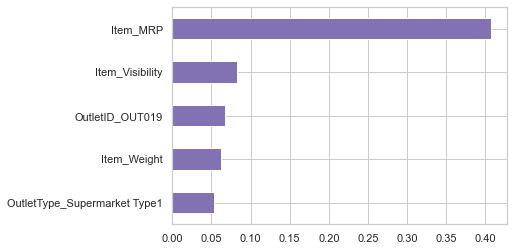

In [82]:

model = ExtraTreesRegressor()
model.fit(X, y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_ , index=X.columns)
feat_importances.nlargest().sort_values(ascending=True).plot(kind='barh', color='m')
plt.show()

** I tried other feature importance techniques using ExtraTreesRegressor

# Modeling 

For Linear Regression, we focus more on the Root Mean Square Error(RMSE)

WHY ?

The **root-mean-square deviation (RMSD)** or **root-mean-square error (RMSE)** is a frequently used measure of the differences between values predicted by a model (or an estimator) and the values actually observed.

In a nutshell the RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. 

The lower RMSE value, the better it fit. 

In [83]:
# Lazy Predict
lazy_clf = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:28<00:00,  1.53it/s]


,R-Squared,RMSE,Time Taken
Model,,,
GradientBoostingRegressor,0.28,1224.50,0.63
AdaBoostRegressor,0.27,1235.28,0.10
LassoLarsCV,0.26,1242.55,0.02
LarsCV,0.26,1242.55,0.03
LassoCV,0.26,1242.61,0.12
LassoLarsIC,0.26,1242.91,0.01
Lasso,0.26,1243.08,0.01
RidgeCV,0.26,1243.10,0.02
BayesianRidge,0.26,1243.11,0.02


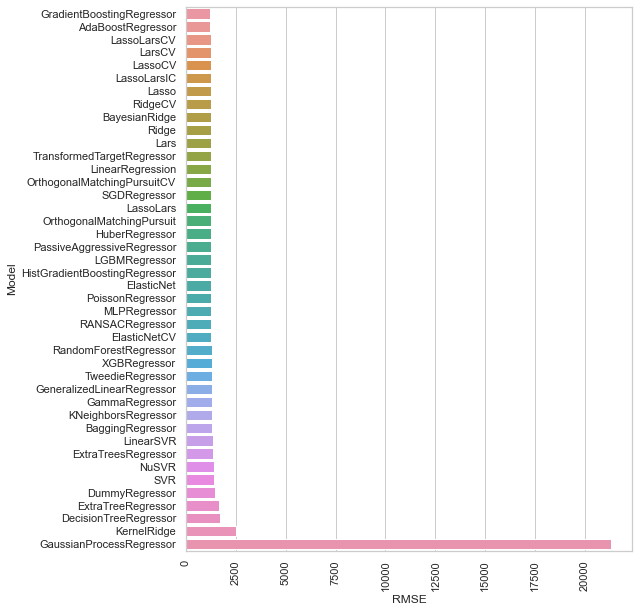

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 10))
ax = sns.barplot(x="RMSE", y=models.index, data=models)
plt.xticks(rotation=90);

**The lower RMSE value, the better it fit.**

In [85]:
# Gradient Boosting Regressor
GradBoostReg = GradientBoostingRegressor(random_state=0)
GradBoostReg.fit(X_train, y_train)
# Predict
y_pred = GradBoostReg.predict(X_test)

print('Train set accuracy : {:.2f}'.format(GradBoostReg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(GradBoostReg.score(X_test,y_test)))
print ( )
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(color.BOLD +"Root Mean Squared Error : "+ color.END, RMSE)
print( )
print("Mean Squared Error : ", MSE)
print("Mean Absolute Error : ", MAE)
print("R squared value: ", r2)

Train set accuracy : 0.58
Test set accuracy : 0.55

Root Mean Squared Error :  970.9160404867382

Mean Squared Error :  942677.9576744455
Mean Absolute Error :  731.9859278258715
R squared value:  0.5499921145118553


In [86]:
# Ada Boost Regressor
AdaBoostReg = AdaBoostRegressor(random_state=0, n_estimators=100)
AdaBoostReg.fit(X_train, y_train)
# Predict
y_pred = AdaBoostReg.predict(X_test)

print('Train set accuracy : {:.2f}'.format(AdaBoostReg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(AdaBoostReg.score(X_test,y_test)))
print ( )
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(color.BOLD +"Root Mean Squared Error : "+ color.END, RMSE)
print( )
print("Mean Squared Error : ", MSE)
print("Mean Absolute Error : ", MAE)
print("R squared value: ", r2)

Train set accuracy : 0.47
Test set accuracy : 0.45

Root Mean Squared Error :  1072.623347733048

Mean Squared Error :  1150520.8461020512
Mean Absolute Error :  844.9624416800688
R squared value:  0.4507737780973783


In [87]:
# LassoLars CV
LasCV = LassoLarsCV(cv=5).fit(X_train, y_train)
# Predict
y_pred = LasCV.predict(X_test)

print('Train set accuracy : {:.2f}'.format(LasCV.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(LasCV.score(X_test,y_test)))
print ( )
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(color.BOLD +"Root Mean Squared Error : "+ color.END, RMSE)
print( )
print("Mean Squared Error : ", MSE)
print("Mean Absolute Error : ", MAE)
print("R squared value: ", r2)

Train set accuracy : 0.52
Test set accuracy : 0.51

Root Mean Squared Error :  1016.9147013830632

Mean Squared Error :  1034115.5098890046
Mean Absolute Error :  788.9838097762922
R squared value:  0.5063424044583865


In [88]:
# Linear Regression
Lreg = LinearRegression()
Lreg.fit(X_train, y_train)
# Predict
y_pred = Lreg.predict(X_test)

print('Train set accuracy : {:.2f}'.format(Lreg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(Lreg.score(X_test,y_test)))
print ( )
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(color.BOLD +"Root Mean Squared Error : "+ color.END, RMSE)
print( )
print("Mean Squared Error : ", MSE)
print("Mean Absolute Error : ", MAE)
print("R squared value: ", r2)
print ( )
print ( )
# viewing the intercept and the coefficients of the model.
print('Linear regression coef_ : {}'.format(Lreg.coef_))
print()
print('Linear regression intercept_ : {}'.format(Lreg.intercept_))

Train set accuracy : 0.54
Test set accuracy : 0.52

Root Mean Squared Error :  1001.5797100801909

Mean Squared Error :  1003161.9156443194
Mean Absolute Error :  774.4624864555796
R squared value:  0.5211187778538906


Linear regression coef_ : [-2.39958821e-01 -6.29710248e+01 -1.23937587e+02  1.40900432e+01
 -7.04385014e+01 -1.81828573e+02  2.15059131e+01 -1.29259768e+02
 -4.34851168e+01  4.19399513e-01 -8.89204211e+01  8.28828862e+00
 -1.46042004e+01  2.54738133e+01  7.04563966e+01  2.75737561e+02
 -2.23546034e+01 -3.68525787e+01 -8.65067625e+01  6.65661851e+02
  1.02176602e+02  9.04926238e+02 -3.26567488e+02  1.56957765e+03
  1.63884182e+02 -6.79302381e+01  2.30491552e+02  3.25166718e+02
  1.98130546e+02 -4.27221328e+02  1.41945067e+03  9.04926238e+02
  1.56957765e+03]

Linear regression intercept_ : -1373.5917278491006


** Comparing the models we can say that the **GradientBoostingRegressor** it has the best RMSE score

** For predicting the test data, we will use GradientBoostingRegressor and compare with other model above.

# TESTING set

In [89]:
sales_test = pd.read_csv(r"test.csv", sep=',', encoding="latin1") 
pd.set_option('display.max_columns', None)

In [90]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Cleaning Testing Dataset

In [91]:
# Filling the null values with the mean value
sales_test['Item_Weight'].fillna(sales_test['Item_Weight'].mean(), inplace=True)
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Distribution 'Item_Weight' is somewhat symmetrical, so we impute with mean()

** Anyway we go ahead to treat Outlet_Size column

In [92]:
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].map({'Small': 1, 'Medium': 2, 'High': 3})

In [93]:
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [94]:
sales_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4387,FDO51,6.79,Regular,0.00,Meat,43.41,OUT046,1997,1.00,Tier 1,Supermarket Type1
1447,FDY56,16.35,Regular,0.06,Fruits and Vegetables,224.71,OUT035,2004,1.00,Tier 2,Supermarket Type1
43,NCL19,15.35,Low Fat,0.02,Others,144.85,OUT018,2009,2.00,Tier 3,Supermarket Type2
2371,FDG52,13.65,Low Fat,0.07,Frozen Foods,46.44,OUT045,2002,nan,Tier 2,Supermarket Type1
5009,NCR50,20.20,Low Fat,0.01,Household,152.53,OUT045,2002,nan,Tier 2,Supermarket Type1


In [95]:
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].fillna(sales_test['Outlet_Size'].median())
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Distribution 'Outlet_Size' is skewed, so we impute with median()

** Anyways we go ahead to work on 'Item_Visibility' column

In [96]:
sales_test['Item_Visibility'] = sales_test['Item_Visibility'].replace(0.000000,0.003591414)

In [97]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size
count,5681.00,5681.00,5681.00,5681.00,5681.00
mean,12.70,0.07,141.02,1997.83,1.83
std,4.25,0.05,61.81,8.37,0.60
min,4.55,0.00,31.99,1985.00,1.00
25%,9.20,0.03,94.41,1987.00,1.00
50%,12.70,0.05,141.42,1999.00,2.00
75%,15.85,0.09,186.03,2004.00,2.00
max,21.35,0.32,266.59,2009.00,3.00


"Outlet_Establishment_Year" is not needed, so we convert into a string/object.

In [98]:
sales_test['Outlet_Establishment_Year'] = sales_test['Outlet_Establishment_Year'].astype('object')
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].astype('object')

In [99]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.00,5681.00,5681.00
mean,12.70,0.07,141.02
std,4.25,0.05,61.81
min,4.55,0.00,31.99
25%,9.20,0.03,94.41
50%,12.70,0.05,141.42
75%,15.85,0.09,186.03
max,21.35,0.32,266.59


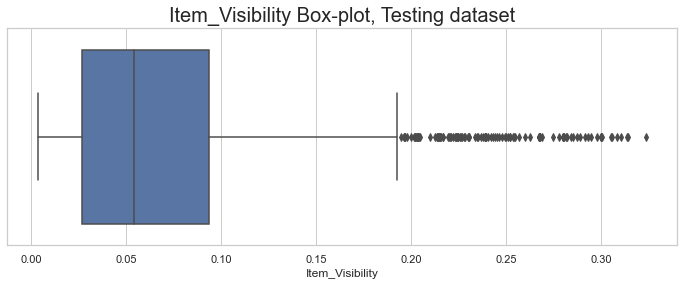

In [100]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = sales_test)
plt.title('Item_Visibility Box-plot, Testing dataset', fontsize=20);

In [101]:
max_threshold = sales_test['Item_Visibility'].quantile(0.98)
print("Maximum threshold:", max_threshold)

min_threshold = sales_test['Item_Visibility'].quantile(0.02)
print("Minimum threshold:", min_threshold)

sales_test = sales_test[ (sales_test['Item_Visibility'] < max_threshold) & 
                                           (sales_test['Item_Visibility'] > min_threshold) ]
sales_test

Maximum threshold: 0.1908142625999988
Minimum threshold: 0.003591414


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,2.00,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,2.00,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,2.00,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,2.00,Tier 2,Supermarket Type1
4,FDY38,12.70,Regular,0.12,Dairy,234.23,OUT027,1985,2.00,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5675,FDW46,13.00,Regular,0.07,Snack Foods,63.45,OUT049,1999,2.00,Tier 1,Supermarket Type1
5676,FDB58,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,1.00,Tier 1,Supermarket Type1
5677,FDD47,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,2.00,Tier 3,Supermarket Type2
5678,NCO17,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,2.00,Tier 2,Supermarket Type1


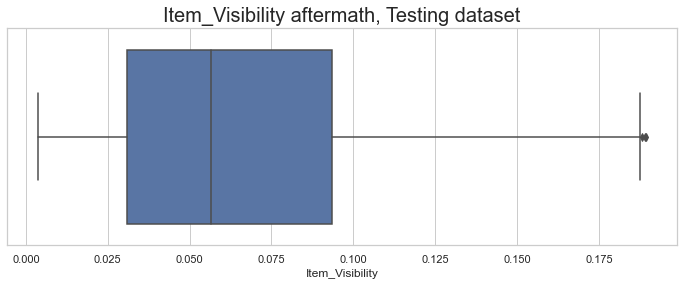

In [102]:
plt.figure(figsize=(12, 4))
sns.boxplot('Item_Visibility', data = sales_test)
plt.title('Item_Visibility aftermath, Testing dataset', fontsize=20);

In [103]:
sales_test['Item_Visibility'].isnull().sum()

0

--No outliers already in Item_Weight--


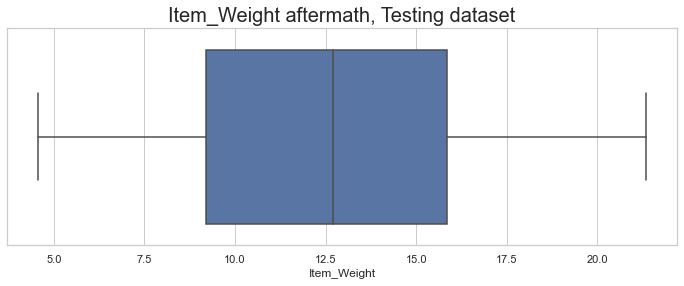

In [104]:
plt.figure(figsize=(12, 4))           # No outliers already
sns.boxplot('Item_Weight', data = sales_test)
plt.title('Item_Weight aftermath, Testing dataset', fontsize=20);

print("--No outliers already in Item_Weight--")

--No outliers already in Item_MRP--


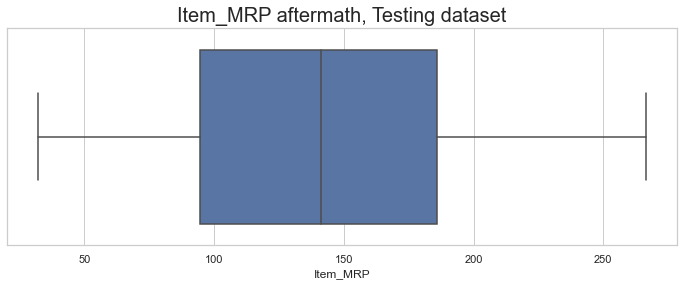

In [105]:
plt.figure(figsize=(12, 4))           # No outliers already
sns.boxplot('Item_MRP', data = sales_test)
plt.title('Item_MRP aftermath, Testing dataset', fontsize=20);

print("--No outliers already in Item_MRP--")

In [106]:
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5214.00,5214.00,5214.00
mean,12.68,0.07,141.13
std,4.25,0.04,61.69
min,4.55,0.00,31.99
25%,9.20,0.03,94.55
50%,12.70,0.06,141.30
75%,15.85,0.09,186.08
max,21.35,0.19,266.59


In [107]:
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('reg', 'Regular')
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].replace('LF', 'Low Fat')

In [108]:
sales_test['Item_Fat_Content'] = sales_test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [109]:
# Creating dummy variables of all the other categorical features

ItemType = pd.get_dummies(sales_test['Item_Type'], prefix='ItemType', drop_first=True)
sales_test = pd.concat([sales_test, ItemType],axis=1)

OutletID = pd.get_dummies(sales_test['Outlet_Identifier'], prefix='OutletID',drop_first=True)
sales_test = pd.concat([sales_test, OutletID],axis=1)

OutLocType = pd.get_dummies(sales_test['Outlet_Location_Type'], prefix='OutLocType',drop_first=True)
sales_test = pd.concat([sales_test, OutLocType],axis=1)

OutletType = pd.get_dummies(sales_test['Outlet_Type'], prefix='OutletType',drop_first=True)
sales_test = pd.concat([sales_test, OutletType],axis=1)

In [110]:
GradBoostR_Prediction = pd.DataFrame(sales_test['Item_Identifier'])
GradBoostR_Prediction['Outlet_Identifier'] = sales_test['Outlet_Identifier']

# Here we pick linear regression for comparison of final prediction
LR_Prediction = pd.DataFrame(sales_test['Item_Identifier'])
LR_Prediction['Outlet_Identifier'] = sales_test['Outlet_Identifier']

In [111]:
sales_test.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type',
                 'Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

sales_test.drop('Item_Identifier',axis=1,inplace=True)

# Prediction

In [112]:
sales_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,ItemType_Hard Drinks,ItemType_Health and Hygiene,ItemType_Household,ItemType_Meat,ItemType_Others,ItemType_Seafood,ItemType_Snack Foods,ItemType_Soft Drinks,ItemType_Starchy Foods,OutletID_OUT013,OutletID_OUT017,OutletID_OUT018,OutletID_OUT019,OutletID_OUT027,OutletID_OUT035,OutletID_OUT045,OutletID_OUT046,OutletID_OUT049,OutLocType_Tier 2,OutLocType_Tier 3,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,20.75,1,0.01,107.86,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,8.30,0,0.04,87.32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,14.60,1,0.10,241.75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.32,1,0.02,155.03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,12.70,0,0.12,234.23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [113]:
sales_test.shape

(5214, 33)

In [114]:
GradBoostReg_item_sales_ = GradBoostReg.predict(sales_test)

GradBoostR_Prediction['Item_Outlet_Sales'] = GradBoostReg_item_sales_ 
GradBoostR_Prediction.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1688.90
1,FDW14,OUT017,1384.60
2,NCN55,OUT010,1070.97
3,FDQ58,OUT017,2476.35
4,FDY38,OUT027,3910.78


In [115]:
Lreg_item_sales_ = Lreg.predict(sales_test)

LR_Prediction['Item_Outlet_Sales'] = Lreg_item_sales_ 
LR_Prediction.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1799.57
1,FDW14,OUT017,1440.49
2,NCN55,OUT010,1597.15
3,FDQ58,OUT017,2441.61
4,FDY38,OUT027,4491.65
